In [1]:
# init SparkContext
from pyspark import SparkContext
sc = SparkContext('local', 'K-means')

In [2]:
# load data from csv file
data_rdd = sc.textFile('../data/digits.csv') \
             .map(lambda line: (line.split(',', 1)[0],
                                list(map(float, line.split(',')[1:]))))

('0', [0.0, 0.0, 5.0, 13.0, 9.0, 1.0, 0.0, 0.0, 0.0, 0.0, 13.0, 15.0, 10.0, 15.0, 5.0, 0.0, 0.0, 3.0, 15.0, 2.0, 0.0, 11.0, 8.0, 0.0, 0.0, 4.0, 12.0, 0.0, 0.0, 8.0, 8.0, 0.0, 0.0, 5.0, 8.0, 0.0, 0.0, 9.0, 8.0, 0.0, 0.0, 4.0, 11.0, 0.0, 1.0, 12.0, 7.0, 0.0, 0.0, 2.0, 14.0, 5.0, 10.0, 12.0, 0.0, 0.0, 0.0, 0.0, 6.0, 13.0, 10.0, 0.0, 0.0, 0.0])


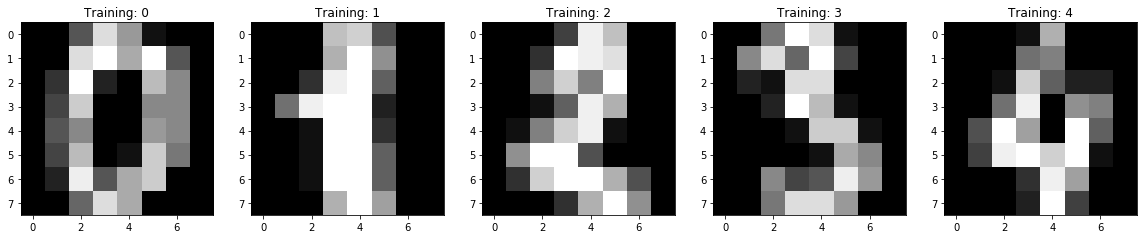

In [3]:
# display sample data
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

sample = data_rdd.take(5)
print(sample[0])

fig = plt.figure(figsize=(20, 10))
for i, (y, x) in enumerate(sample, 1):
    subplot = fig.add_subplot(1, len(sample), i)
    plt.imshow(np.array(x).reshape((8, 8)), cmap='gray');
    subplot.set_title('Training: %s' % y);

In [5]:
from pyspark.sql import Row
from pyspark.sql import SparkSession
from pyspark.ml.linalg import Vectors

spark = SparkSession.builder.getOrCreate()

data_df = data_rdd.map(lambda v: Row(
                label=v[0], 
                features=Vectors.dense(v[1]))).toDF()

data_df.show(5)

+--------------------+-----+
|            features|label|
+--------------------+-----+
|[0.0,0.0,5.0,13.0...|    0|
|[0.0,0.0,0.0,12.0...|    1|
|[0.0,0.0,0.0,4.0,...|    2|
|[0.0,0.0,7.0,15.0...|    3|
|[0.0,0.0,0.0,1.0,...|    4|
+--------------------+-----+
only showing top 5 rows



In [ ]:
from pyspark.ml.feature import StandardScaler

scaler = StandardScaler(withMean=True, 
                        withStd=True,
                        inputCol='features',
                        outputCol='scaled_features')

# TODO: preprocess data: scale and center to zero

In [ ]:
from pyspark.ml.clustering import KMeans

# TODO: cluster data using KMeans

In [ ]:
# TODO: examine model summary: kmeans_model.summary


In [ ]:
# TODO: get prediction using kmeans_model.transform


In [ ]:
# visualize results
%matplotlib inline
import matplotlib.pyplot as plt

from itertools import groupby
from operator import itemgetter
from collections import Counter

from sklearn.decomposition import PCA

# predict cluster labels and load results to driver program
prediction = prediction_frame.select('prediction',
                                     'label', 
                                     'scaled_features').collect()

X = np.array([cluster_label_x[2] for cluster_label_x in prediction])
clusters = [cluster_label_x[0] for cluster_label_x in prediction]
labels = [cluster_label_x[1] for cluster_label_x in prediction]

# reduce feature space dimention
X_reduced = PCA(n_components=2).fit_transform(X)

# map prediction to original labels
cluster_to_label = dict((c, Counter(map(itemgetter(1), v)).most_common()[0][0])
                        for c, v in groupby(sorted(zip(clusters, labels)),
                                            key=itemgetter(0)))

clusters = [cluster_to_label[cluster] for cluster in clusters]

# show results
fig = plt.figure(figsize=(20, 10))

subplot = fig.add_subplot(1, 2, 1)
plt.scatter(X_reduced[:,0], X_reduced[:,1], c=labels);
subplot.set_title('Original');

subplot = fig.add_subplot(1, 2, 2)
plt.scatter(X_reduced[:,0], X_reduced[:,1], c=clusters);
subplot.set_title('Prediction');

In [ ]:
# compute cost
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

# Return the K-means cost (sum of squared distances of points to their nearest center)
# for this model on the given data.
print('K-Means cost: %s' % kmeans_model.computeCost(scaled_frame))

print(confusion_matrix(labels, clusters))
print('Accuracy score: %.3f' % accuracy_score(labels, clusters))